In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv("E:/Skola/PycharmProjects/nn_covid-19_predictions/data/models/c19-week-4/train.csv", parse_dates=['Date'])
df_test = pd.read_csv("E:/Skola/PycharmProjects/nn_covid-19_predictions/data/models/c19-week-4/test.csv", parse_dates=['Date'])

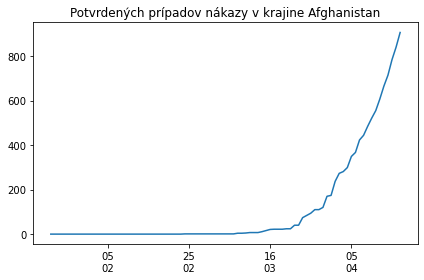

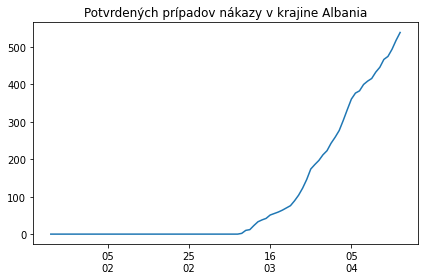

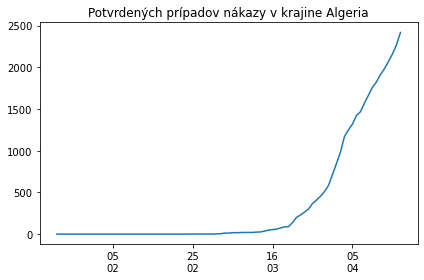

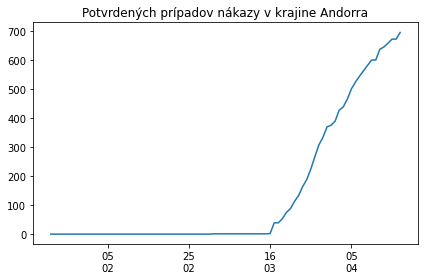

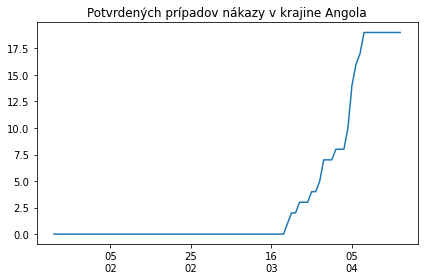

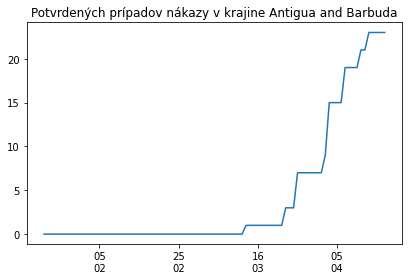

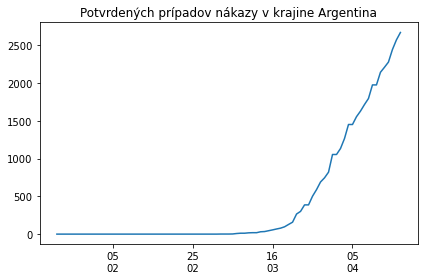

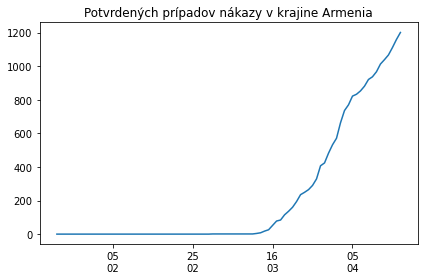

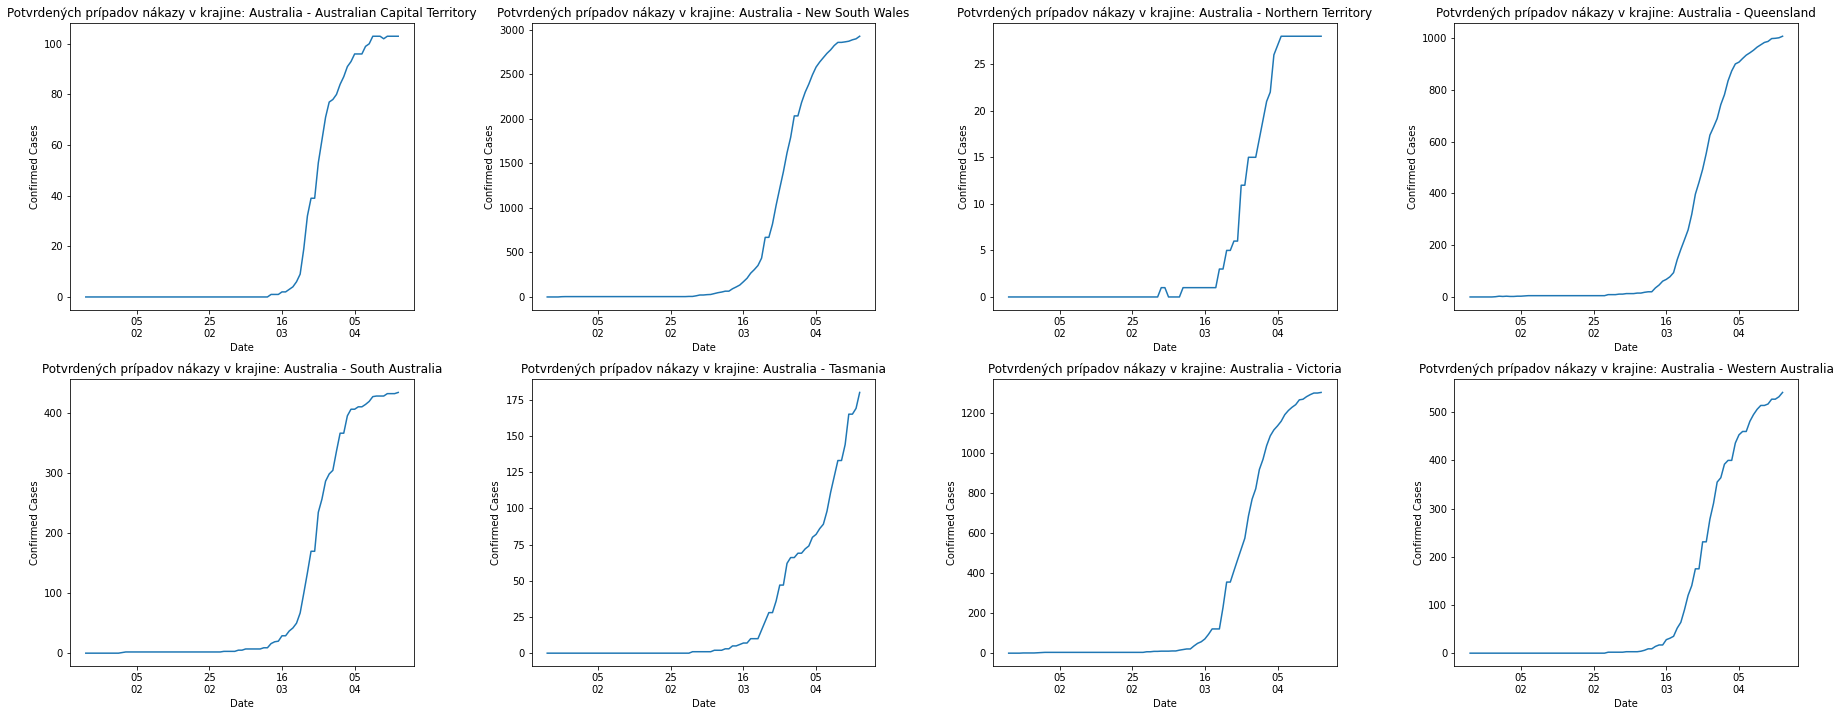

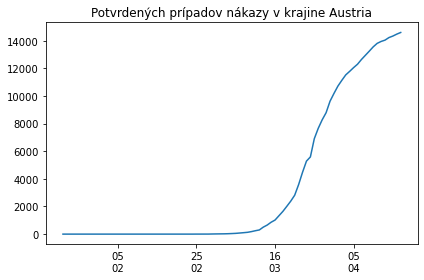

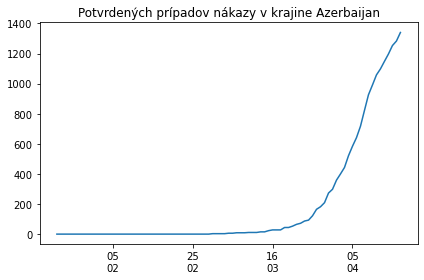

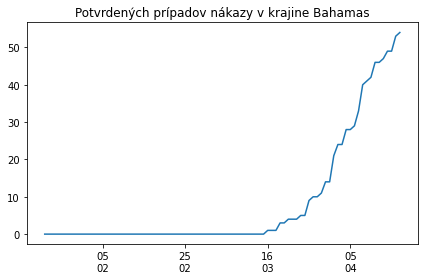

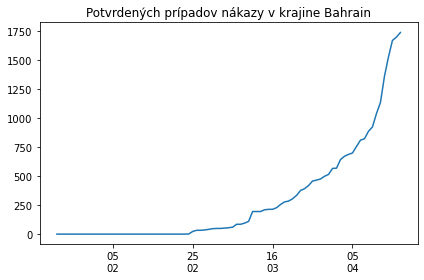

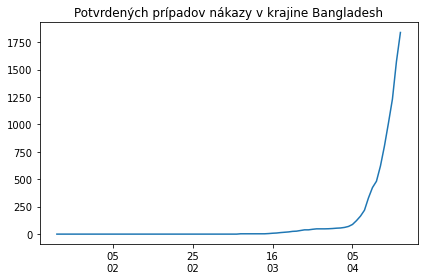

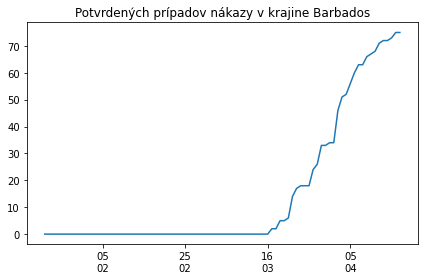

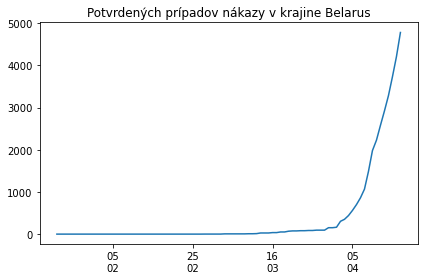

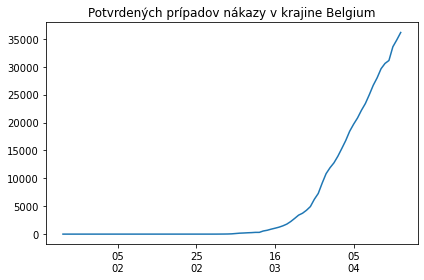

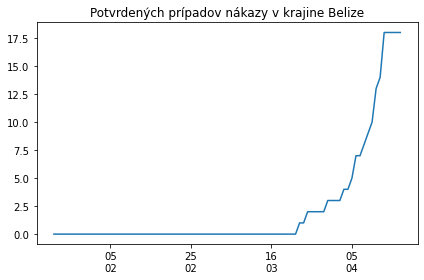

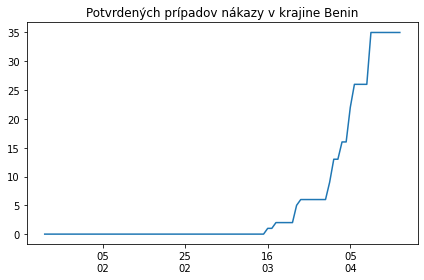

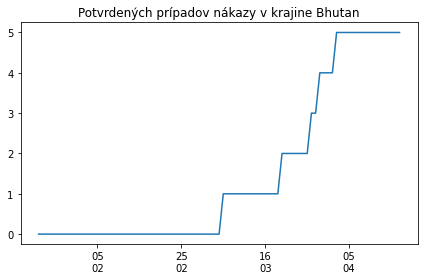

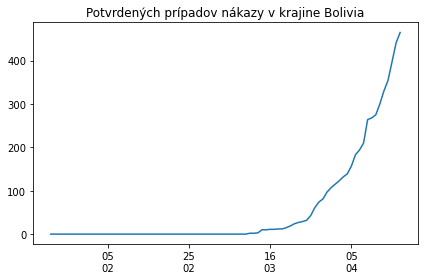

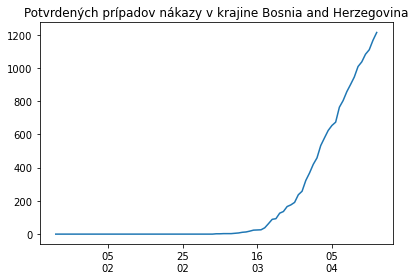

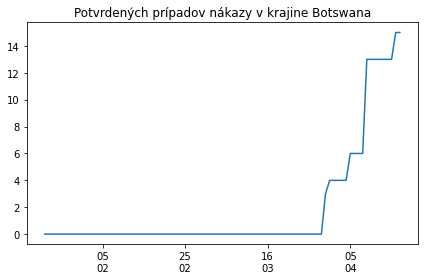

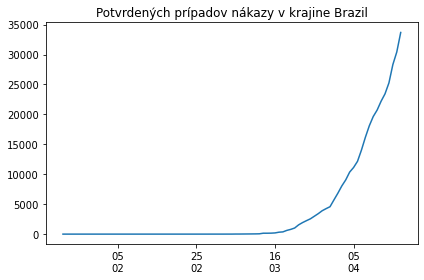

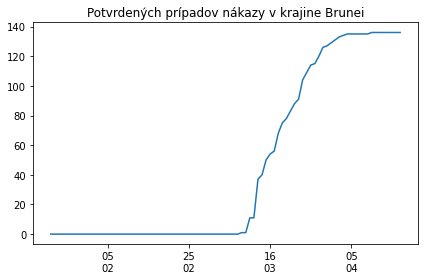

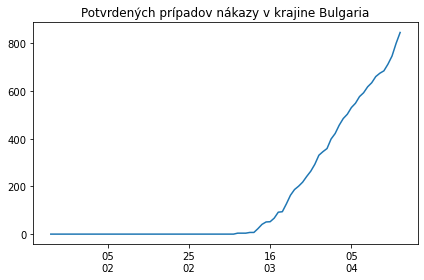

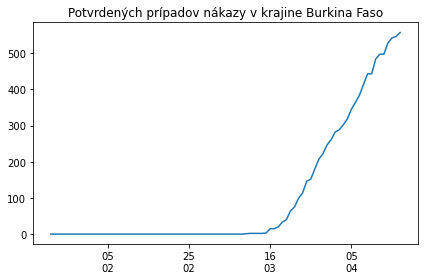

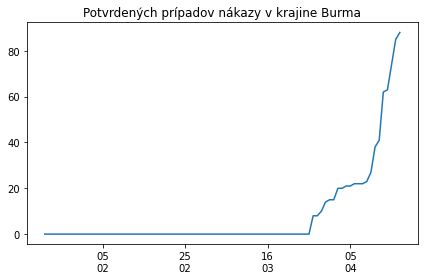

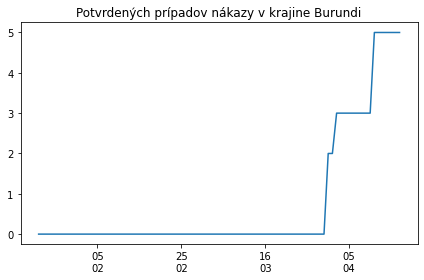

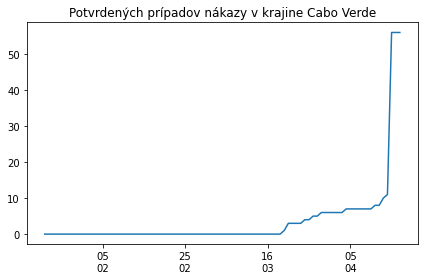

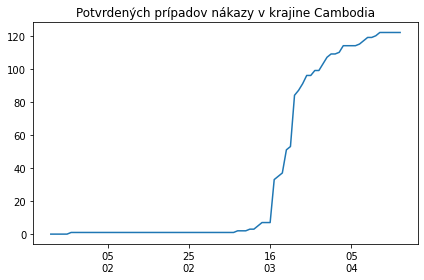

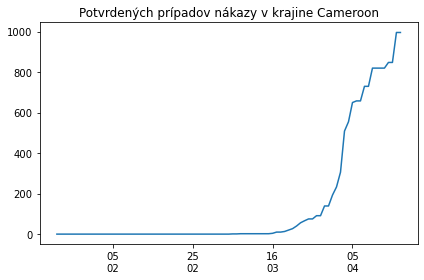

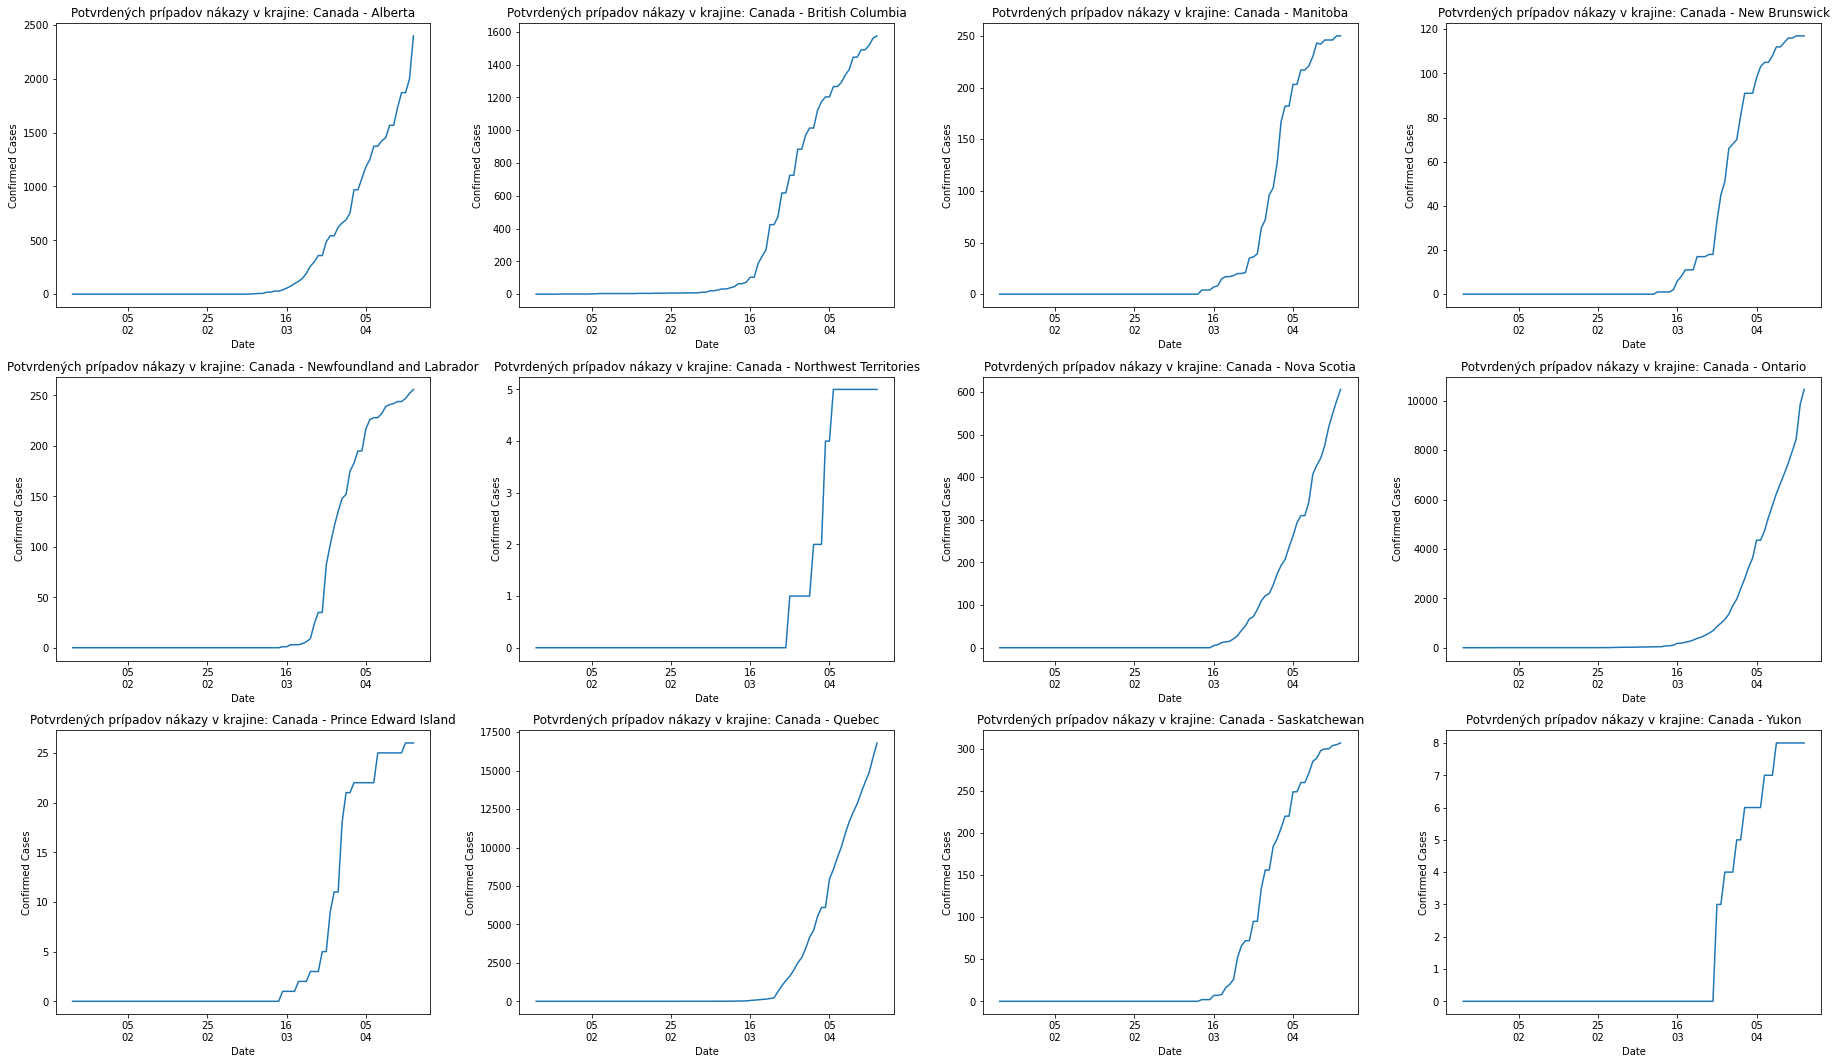

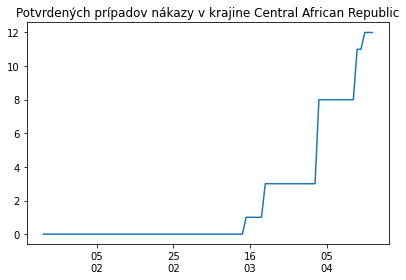

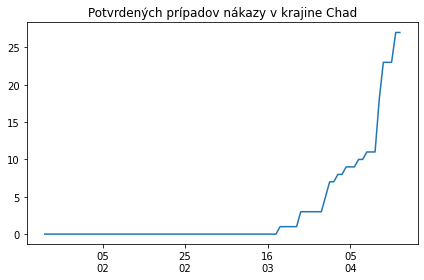

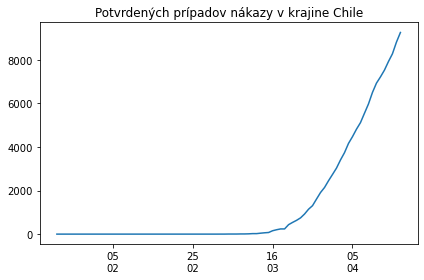

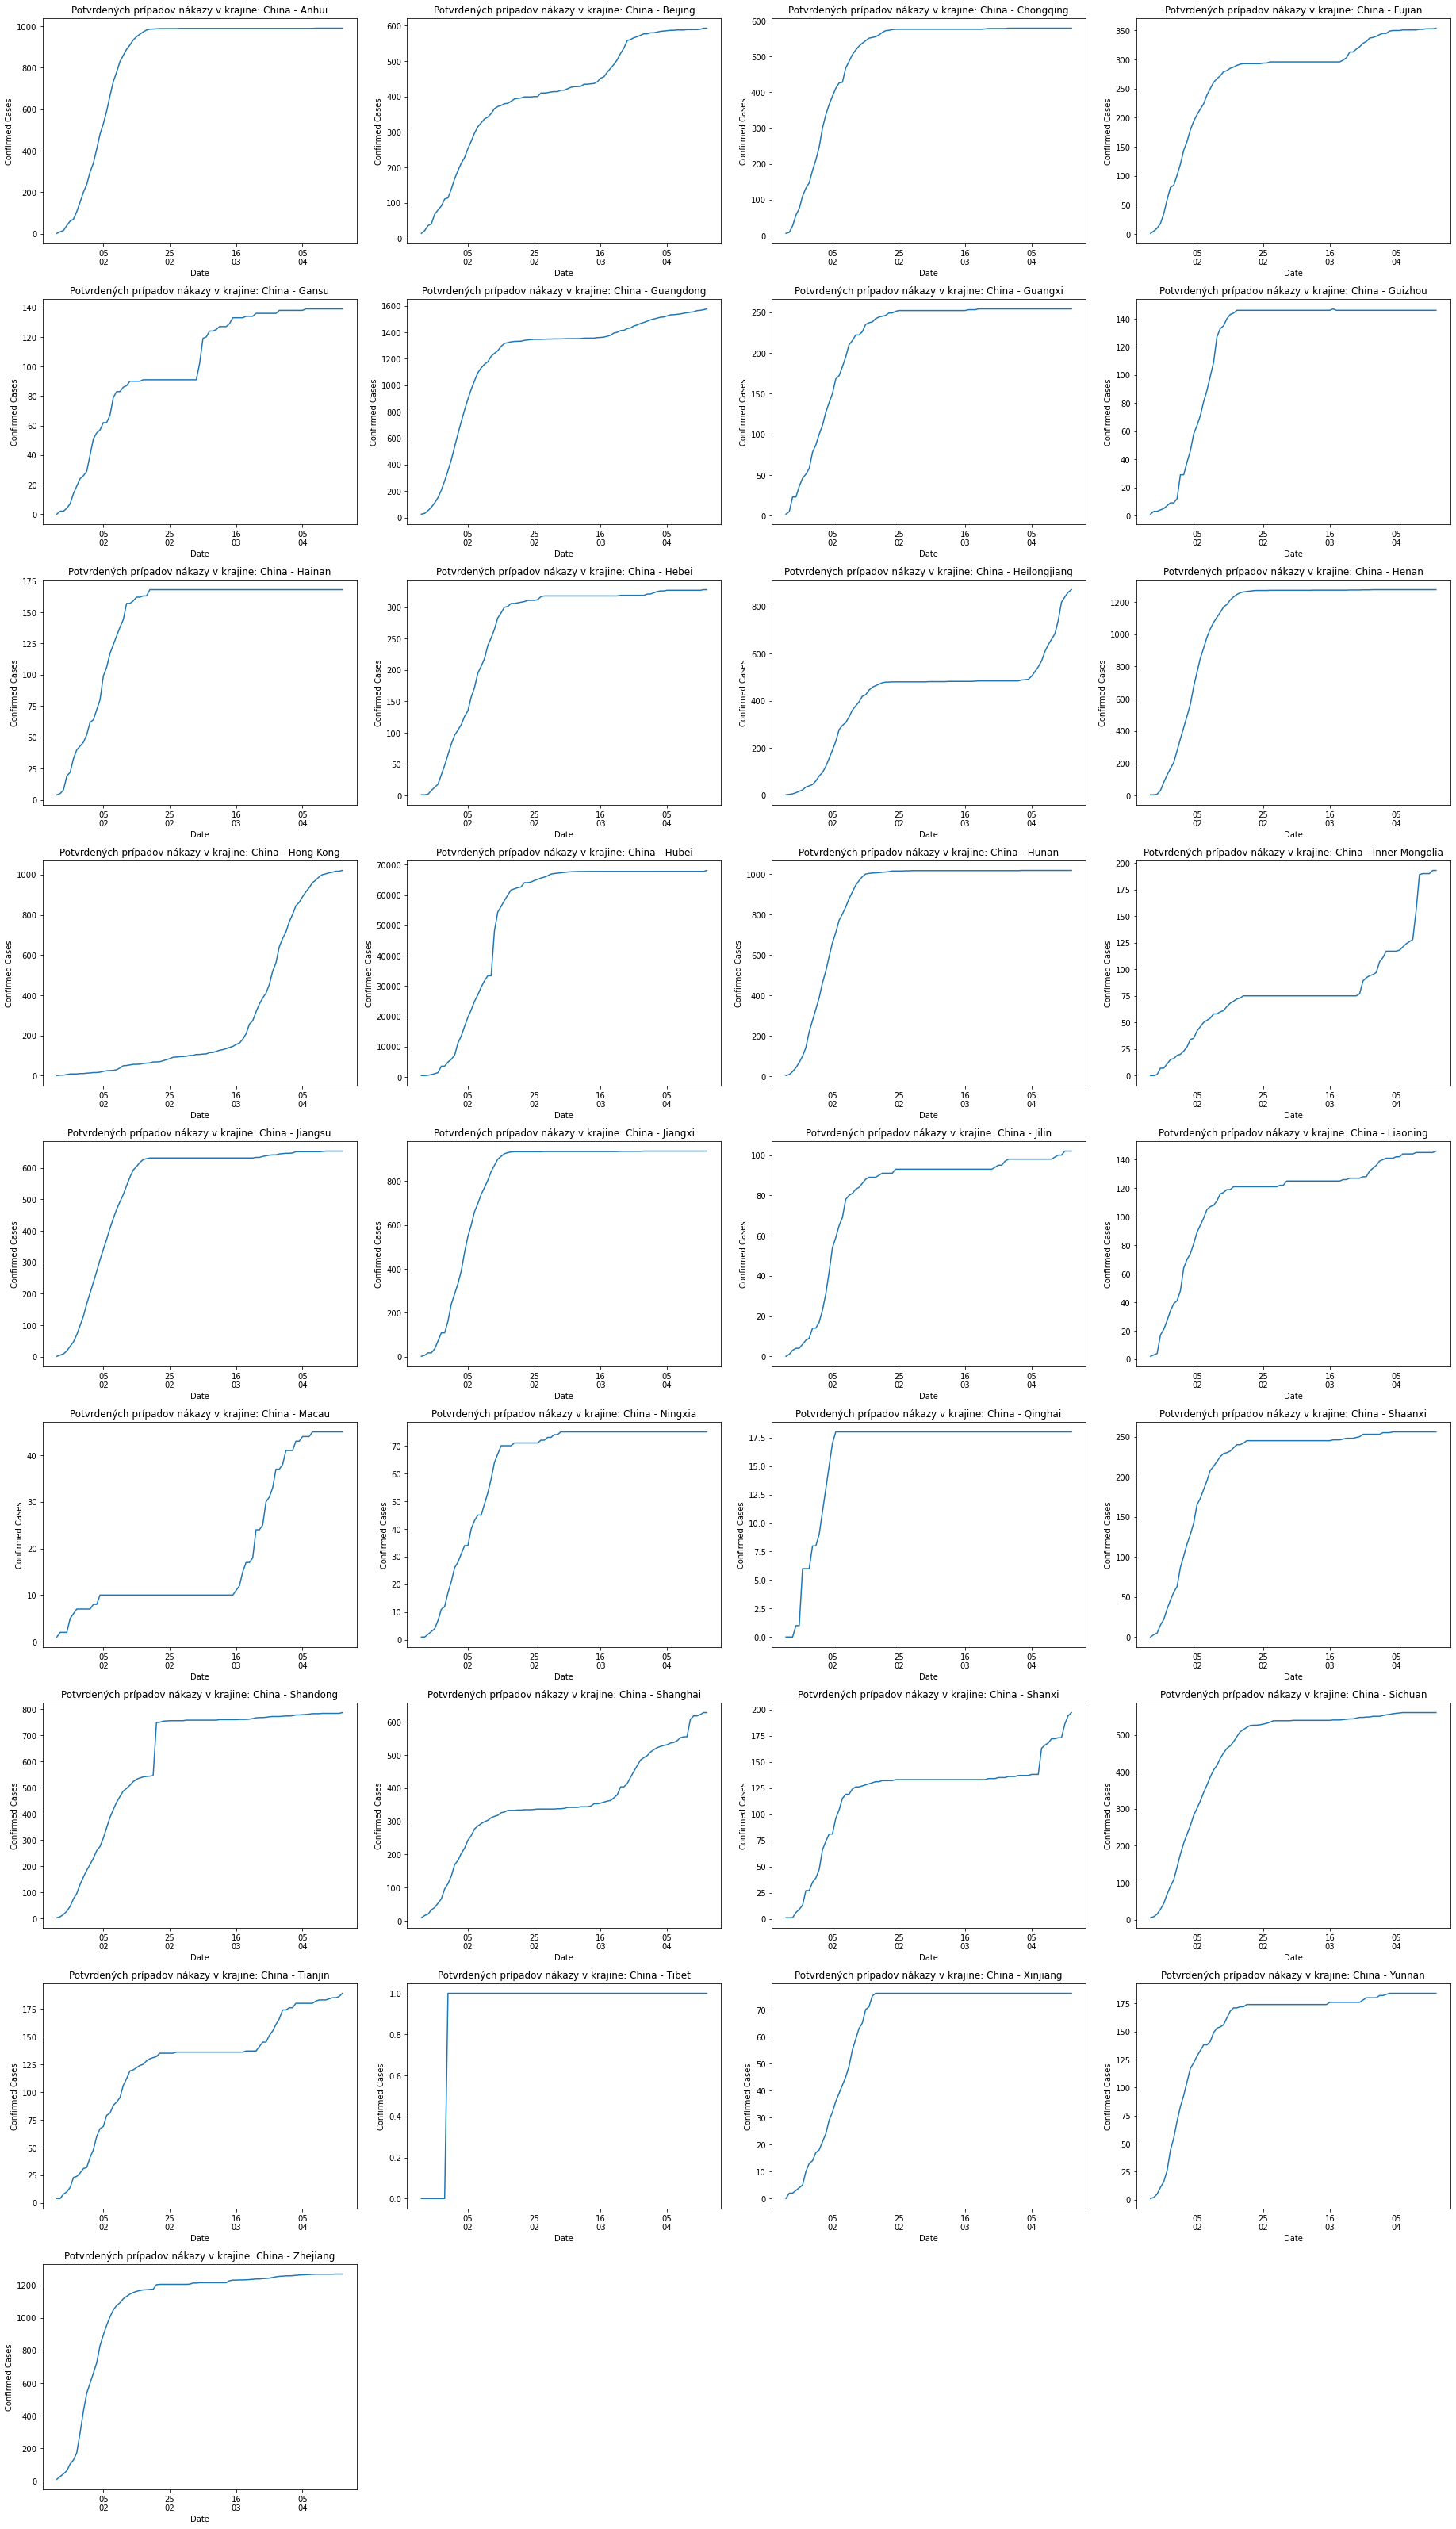

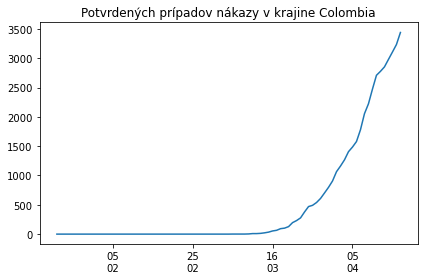

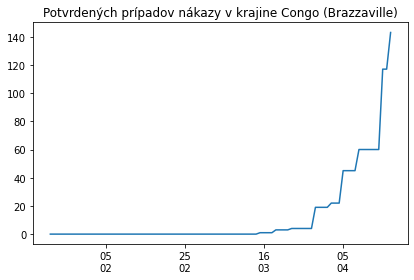

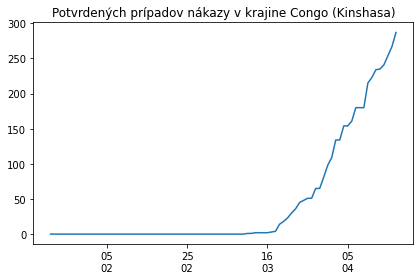

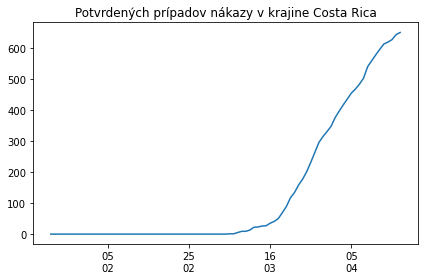

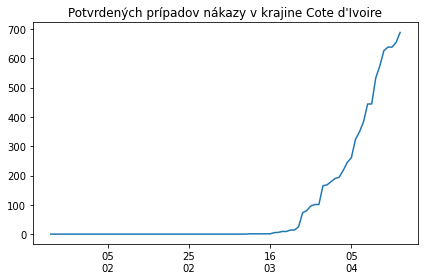

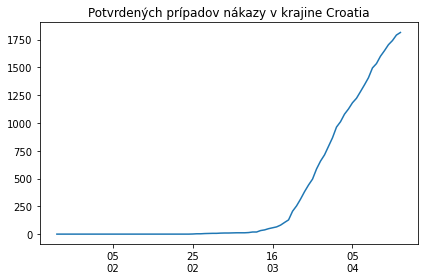

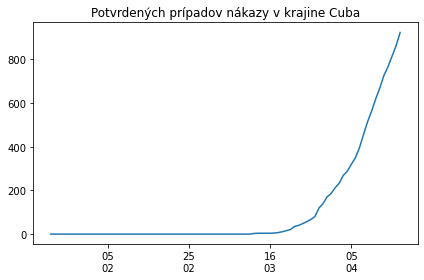

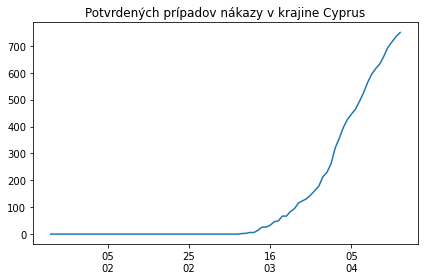

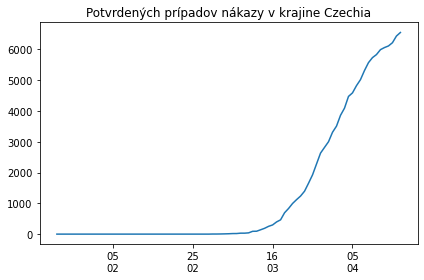

ValueError: Cannot convert -1 to a date.  This often happens if non-datetime values are passed to an axis that expects datetime objects.

ValueError: Cannot convert -1 to a date.  This often happens if non-datetime values are passed to an axis that expects datetime objects.

<Figure size 1843.2x604.8 with 3 Axes>

In [5]:
# vypis grafu
for country in df_train['Country_Region'].unique():
    df_train_country = df_train[df_train['Country_Region'] == country]
    # ak krajina nema provincie (ako napr Slovensko, USA ma), tak daj do grafu krajinu
    if df_train_country['Province_State'].isna().unique().all():
        plot_title = 'Potvrdených prípadov nákazy v krajine ' + str(country)
        # graf
        #ax, fig = plt.subplots(figsize=(4*6.4, 4*4.8))
        ax = plt.gca()
        xaxis = df_train_country['Date'].tolist()
        yaxis = df_train_country['ConfirmedCases']
        
        # zmena formatu datumu v grafe, aby boli pod sebou a boli lepsie vidiet
        # Zmena datetime objektov do matplotlib datumov
        xaxis = matplotlib.dates.date2num(xaxis)
        hfmt = matplotlib.dates.DateFormatter('%d\n%m')
        ax.xaxis.set_major_formatter(hfmt)
        
        plt.plot(xaxis, yaxis)
        plt.title(plot_title)
        plt.tight_layout()
        plt.show()
    else:
        # v pripade ze krajina ma provincie
        # do grafu sa da kazda provincia alebo stat z krajiny
        # daju sa vedla seba
        state_count = len(df_train_country['Province_State'].unique())
        # rozdel graf do styroch stlpcov
        num_rows = state_count / 4 + 1
        num_cols = 4
        index =1
        
        #fig = plt.figure(figsize=(20, 10))
        fig =plt.figure(figsize = (4*6.4,num_rows*4.8))
        
        for state in df_train_country['Province_State'].unique():
            df_train_state = df_train_country[df_train_country['Province_State'] == state]
            plot_title = 'Potvrdených prípadov nákazy v krajine: ' + str(country) + ' - '+ str(state)
            
            # graf - plot
            ax = fig.add_subplot(num_rows, num_cols, index)
            x_axis = df_train_state['Date'].tolist()
            y_axis = df_train_state['ConfirmedCases']
            
            # zmena formatu datumu v grafe
            x_axis = matplotlib.dates.date2num(x_axis)
            hfmt = matplotlib.dates.DateFormatter('%d\n%m')
            ax.xaxis.set_major_formatter(hfmt)
            
            ax.plot(x_axis, y_axis)
            ax.set_xlabel('Date')
            ax.set_ylabel('Confirmed Cases')
            ax.set_title(plot_title)
            fig.tight_layout()
            index+=1
        plt.show()